# Procesamiento de textos en el corpus

En esta notebook seguiremos el proceso de limpieza manual del corpus creado para estas clases, donde buscaremos comparar textos de economía política de diversos autores, y se creará la distribución de frecuencia de diversas palabras.

## Archivos del Corpus

El corpus para esta ejercitación consiste en diversas obras de dos economistas que en los últimos meses han sido nombrados muchas veces por todo el espectro político argentino.
Estos son John Maynard Keynes y Friedrich August Von Hayek, quienes se enfrentaron en una polémica desde finales de la década del 20 del siglo anterior. Este debate cimentó las divisiones del pensamiento económico actual. Desde el análisis sobre el papel del Estado hasta la política en la gestión económica.

Los archivos del corpus están disponibles en la carpeta `assets\corpus` y los unificaremos como ``keynes_text`` y ``hayek_text``

Vamos a instalar e importar las librerías con las que trabajaremos:
* [OS](https://docs.python.org/es/3/library/os.html), es fundamental para realizar manipulación de archivos y directorios en Python
* [Natural Language Toolkit (NLTK)](http://www.nltk.org/), una potente biblioteca que es utilizada para trabajar con lenguaje natural en Python. Esta proporciona herramientas para tokenización, etiquetado, análisis de texto, corpus de datos, etc.
* [Matplotlib](https://matplotlib.org/), es una biblioteca de visualización. Es utilizada para generar gráficos de los resultados de los análisis realziados, como la frecuencia de palabras. 
* [Re](https://docs.python.org/es/3/library/re.html), módulo para trabajar con expresiones regulares. Es muy útil al momento de realizar limpieza y preprocesamiento del texto, pues elimina caracteres no deseados y normaliza el formato.
* [TextBlob](https://textblob.readthedocs.io/en/dev/), es una librería de procesamiento del texto para Python. Esta permite realizar tareas de Procesamiento del Lenguaje Natural como análisis morfológico, extracción de entidades, análisis de opinión, traducción automática, etc.
* [SpellChecker](https://pypi.org/project/pyspellchecker/), librería que se utilzia 

In [1]:
# pip install textblob o !pip install textblob #recuerda que si sale un mensaje de módulo no encontrado, deberás instalarlo

In [2]:
import os
import nltk 
from nltk.corpus import stopwords #Importa la lista stopwords que elimina las palabras comunes de un corpus
from nltk.probability import FreqDist #Módulo de la librería que es útil para calcular la frecuencia de aparición de elementos (como palabras) en un texto.
import matplotlib.pyplot as plt
import re
from spellchecker import SpellChecker

In [3]:
import os

# Nos situamos en la carpeta donde se encuentran los archivos
carpeta = 'assets/corpus'

# Generamos una lista vacía para almacenar los textos
keynes_texts = []

# Realizamos una iteración sobre los archivos en la carpeta
for archivo in os.listdir(carpeta):
    # Comprobamos si el archivo comienza con 'keynes' y termina con '.txt'
    if archivo.startswith('keynes') and archivo.endswith('.txt'):
        # Construímos la ruta completa del archivo
        ruta_completa = os.path.join(carpeta, archivo)
        # Abrir y leer el archivo
        with open(ruta_completa, 'r', encoding='ISO-8859-1', errors='replace') as f: #en este punto se puede modificar la codificación, con utf-8 observé demasiados errores
            texto = f.read()
            # Añadir el contenido del archivo a la lista
            keynes_texts.append(texto)

for texto in keynes_texts[:5]:
    print(texto)
    
# Presentamos los primeros elementos
#primeros_elementos = keynes_texts[:5]
#for i, texto in enumerate(primeros_elementos):
#    print(f"Texto {i+1}:\n{texto}\n")







1 
.: 
.1 
·1 












X:XU l¡r,;TRQOtJCCIÓX 
denuncia la impotencia de los llamados expertos para explié:?r-!z siroaci: No hay exper­tos: ~La ciencia de la economía, de la banca y de las finanzas está muy arrasada~ (1931, XX, pág. 516)11. Es posible que el avance del conocimiento permira que los expenos 
puedan afromar la prima depresin, pero en la actual predomina el desconcierto. No es un problema de técnica, ni de recur.sos o capacidad productiva: 
Es-me avenruro a afumar-nada má, que la quiebra del misterioso poder de coor· dioaci de la banca. y las finanzas. ¿Co lo diría? Este poder de coordinar na falla­do en cr~ d enromo ffl e[ que nucsrcas energías encuentren la aplicaci apropiada (ioíckm, pá~ s11¡. 
2.2. Viaje a los Estados UJtidos (mayo-¡11lio de 1931) 
La justificaci principal de su viaje era dar tres conferencias en Chicago, ca la Harris Foundarion, sobre el cerna "An Economic Analysis of Unemployment. Además, comparce en reuniones para debatir la situaci econica

In [4]:
#Ahora repetimos para Hayek

# Nos situamos en la carpeta donde se encuentran los archivos
carpeta = 'assets/corpus'

# Generamos una lista vacía para almacenar los textos
hayek_texts = []

# Realizamos una itración sobre los archivos en la carpeta
for archivo in os.listdir(carpeta):
    # Comprueba si el archivo comienza con 'keynes' y termina con '.txt'
    if archivo.startswith('hayek') and archivo.endswith('.txt'):
        # Construye la ruta completa del archivo
        ruta_completa = os.path.join(carpeta, archivo)
        # Abre y lee el archivo
        with open(ruta_completa, 'r', encoding='utf-8', errors='replace') as f: #modificar la codificación si es necesario
            texto = f.read()
            # Añade el contenido del archivo a la lista
            hayek_texts.append(texto)

# Presentamos la lista con los textos cargados
for texto in hayek_texts[:5]:
    print(texto)
#Código para listar los primeros elementos
# primeros_elementos = hayek_texts[:5]
#for i, texto in enumerate(primeros_elementos):
#    print(f"Texto {i+1}:\n{texto}\n")

1





Friedrich A. Hayek

LOS FUNDAMENTOS

DE LA LIBERTAD





2





ISBN

0

1

Unión Editorial

Madrid, 01





Título original: The Constitution of Liberty Friedrich A. Hayek, 1960

Traducción: José Vicente Torrente Secorún





3





A la desconocida civilización que se está desarrollando en América.





4





PREFACIO

El propósito de esta obra lo explica más adelante la Introducción. Los pocos párrafos que concluyen esta nota testimonian mi gratitud a aquellas personas con quienes estoy en deuda. Sólo me resta, por tanto, hacer una advertencia y presentar una disculpa.

Mi obra no se refiere principalmente a lo que la ciencia enseña. Aunque no hubiera sido posible escribirla sin dedicar gran parte de mi vida al estudio de la economía y consagrarme recientemente a informarme sobre las conclusiones de otras varias ciencias sociales, no me refiero exclusivamente a hechos ni me limito a relaciones de causa y efecto.

Mi objetivo es describir un ideal, demostrar cómo puede alcanz

##### Explicación del código

* ``os.listdir (carpeta)``, realiza una lista de todos los archivos en la carpeta especificada.
* ``archivo.startswith(' ')`` and ``archivo.endswith('.txt')``, filtra los archivos que comienzan con los caracteres que se especifique entre comillas simples y termine con ".txt"
* ``os.path.join(carpeta, archivo)``, con este comando indicamos que se construya la ruta completa para acceder al archivo
* `with open(ruta_completa, 'r', encoding='utf-8') as f:`: Abrirá el archivo en modo lectura con codificación UTF-8 o la especificada
* ``f.read()``: Leerá el contenido del archivo
* ``keynes_texts.append(texto)``: Se añadirá el contenido del archivo a la lista keynes_texts o hayek_texts
* Con ``for texto in keynes_texts[:5]:`` ``print(texto)`` nos aseguramos que si hay algo en la lista lo presentará sino indicará que la lista está vacía. 

## Preparición del texto para procesarlo

Previo al procesamiento del corpus, deberemos realizar algunos cambios, eliminar las palabras vacías (stopwords) en español, y cargar el tokenizador en el idioma que trabajamos.

Recordemos que las palabras vacías son las más abundantes en un texto, y están conformadas por verbos de uso común, artículos, preposiciones, etc.

La tokenización es un proceso por el cual se divide un texto en unidades más pequeñas, que se denominan **tokens**. Estos pueden ser palabras, frases o caracteres.

##### Creamos una función de preprocesamiento

A continuación generaremos una función para trabajar con nuestros textos, en ella indicaremos, que convierta todo a minúsculas, que elimine y sustituta los caracteres que no sean alfanuméricos, por espacios. Luego que tokenize el texto, y por último que elimine las palabras vacías.

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

# Precompilar el patrón de expresión regular para eliminar caracteres no alfanuméricos
non_alpha_numeric = re.compile(r'\W+')

def preprocess(text):
    # Convertimos a minúsculas
    text = text.lower()
    
    # Eliminamos caracteres no alfanuméricos que no forman parte de las palabras
    text = non_alpha_numeric.sub(' ', text)
    
    # Tokenizamos el texto en palabras individuales
    tokens = nltk.word_tokenize(text, language='spanish')
    
    # Cargar stopwords en español y agregar palabras adicionales
    spanish_stopwords = set(stopwords.words('spanish'))
    custom_stopwords = {'hecho', 'cualquier', 'puede', 'pues', 'parte', 'mayoría', 'sino', 'producci', 'tipo', 'sólo', 'tales', 'general', 'isbn'} #estas palabras fueron añadidas luego de un primer procesamiento
    all_stopwords = spanish_stopwords.union(custom_stopwords)
    
    # Eliminamos stopwords en español y palabras con menos de 4 caracteres
    tokens = [word for word in tokens if word not in all_stopwords and len(word) > 3]
    
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Preprocesar las listas de textos
keynes_tokens = [token for text in keynes_texts for token in preprocess(text)]

# Mostrar los primeros elementos de la lista preprocesada para verificar
print(keynes_tokens[:5])  # Imprime los primeros 2 textos preprocesados

['trqotjccióx', 'denuncia', 'impotencia', 'llamados', 'expertos']


In [7]:
# Preprocesar las listas de textos

hayek_tokens = [token for text in hayek_texts for token in preprocess(text)]

# Mostrar los primeros elementos de la lista preprocesada para verificar
print(hayek_tokens[:5])  # Imprime los primeros 2 textos preprocesados

['friedrich', 'hayek', 'fundamentos', 'libertad', 'unión']


In [8]:
# Frecuencia de Palabras
keynes_fd = FreqDist(keynes_tokens)
# Imprimir las 10 palabras más comunes en los textos de Keynes
print("Palabras más comunes en los textos de Keynes:")
print(keynes_fd.most_common(10))


Palabras más comunes en los textos de Keynes:
[('precios', 1240), ('dinero', 1164), ('valor', 745), ('banco', 699), ('nivel', 682), ('bancos', 649), ('cambio', 634), ('alemania', 579), ('caso', 574), ('poder', 517)]


In [9]:
# Frecuencia de Palabras

hayek_fd = FreqDist(hayek_tokens)
# Imprimir las 10 palabras más comunes en los textos de Keynes
print("Palabras más comunes en los textos de Hayek:")
print(hayek_fd.most_common(10))

Palabras más comunes en los textos de Hayek:
[('libertad', 978), ('bienes', 650), ('bien', 574), ('producción', 564), ('poder', 509), ('precios', 444), ('sociedad', 431), ('gobierno', 428), ('tiempo', 408), ('aunque', 402)]


In [10]:
# Densidad de Vocabulario
keynes_vocabulary_density = len(set(keynes_tokens)) / len(keynes_tokens)
hayek_vocabulary_density = len(set(hayek_tokens)) / len(hayek_tokens)

In [11]:
print("La densidad del vocabulario en los textos de Keynes es:")
print(keynes_vocabulary_density)

La densidad del vocabulario en los textos de Keynes es:
0.2390838033253461


In [12]:
print("La densidad del vocabulario en los textos de Hayek es:")
print(hayek_vocabulary_density)

La densidad del vocabulario en los textos de Hayek es:
0.13211121003352075


In [13]:
#O podemos comparar la densidad de vocabulario de la siguiente manera: 
print(f"Densidad de Vocabulario en Keynes: {keynes_vocabulary_density}")
print(f"Densidad de Vocabulario en Hayek: {hayek_vocabulary_density}")

Densidad de Vocabulario en Keynes: 0.2390838033253461
Densidad de Vocabulario en Hayek: 0.13211121003352075


* Frecuencias de Palabras: Se visualizan las palabras más comunes en las obras de Keynes y Hayek.
* Densidad de Vocabulario: Se compara cómo varía la riqueza léxica entre los dos autores.

# Visualización de las frecuencias

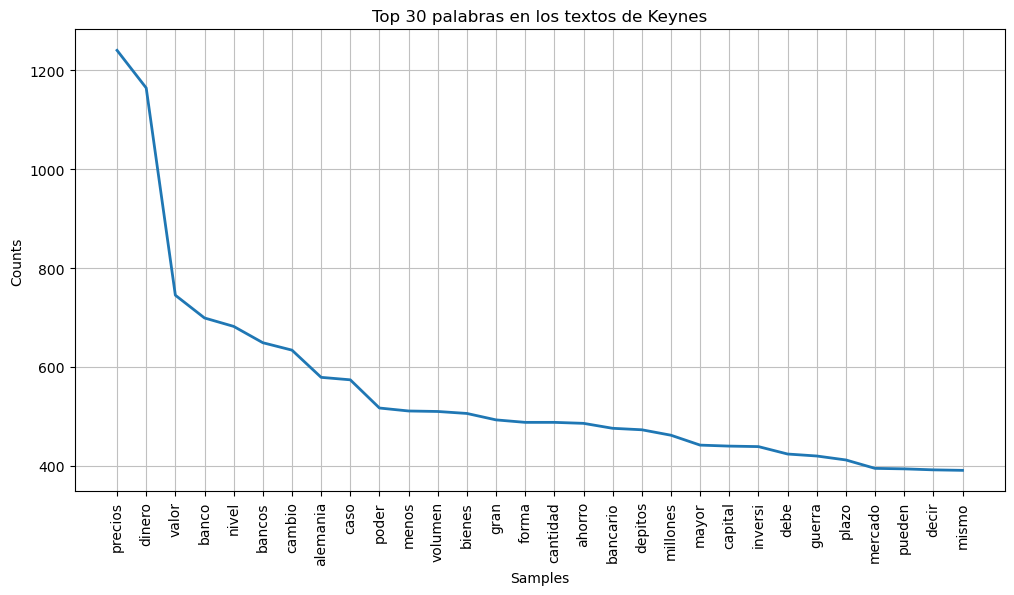

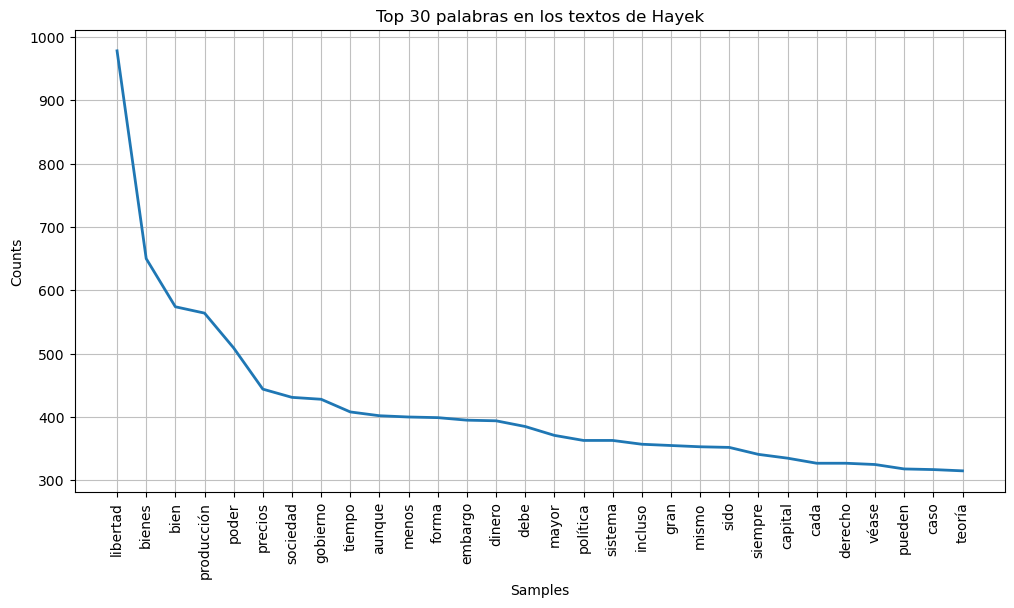

<Axes: title={'center': 'Top 30 palabras en los textos de Hayek'}, xlabel='Samples', ylabel='Counts'>

In [14]:
# Graficar las frecuencias de palabras más comunes
plt.figure(figsize=(12, 6))

# Visualización de Frecuencias
keynes_fd.plot(30, title="Top 30 palabras en los textos de Keynes")

plt.figure(figsize=(12, 6))
hayek_fd.plot(30, title="Top 30 palabras en los textos de Hayek")

### Análisis de estilo (Tf-Idf, distancias, etc.)

# del que sigue no estoy segura que esea correcto

# calcuclo tf idf vectorizao y grafico

In [15]:
#se podría calcular 
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, max_df=0.8, min_df=5)
tfidf_matrix = vectorizer.fit_transform(hayek_tokens)
terms = vectorizer.get_feature_names_out()

# Ya puedes trabajar con la matriz tfidf_matrix
print(f"Número de documentos: {tfidf_matrix.shape[0]}")
print(f"Número de términos: {tfidf_matrix.shape[1]}")

Número de documentos: 167359
Número de términos: 1000


In [16]:
#se podría calcular 
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, max_df=0.8, min_df=5)
tfidf_matrix = vectorizer.fit_transform(keynes_tokens)
terms = vectorizer.get_feature_names_out()

# Ya puedes trabajar con la matriz tfidf_matrix
print(f"Número de documentos: {tfidf_matrix.shape[0]}")
print(f"Número de términos: {tfidf_matrix.shape[1]}")


Número de documentos: 191138
Número de términos: 1000


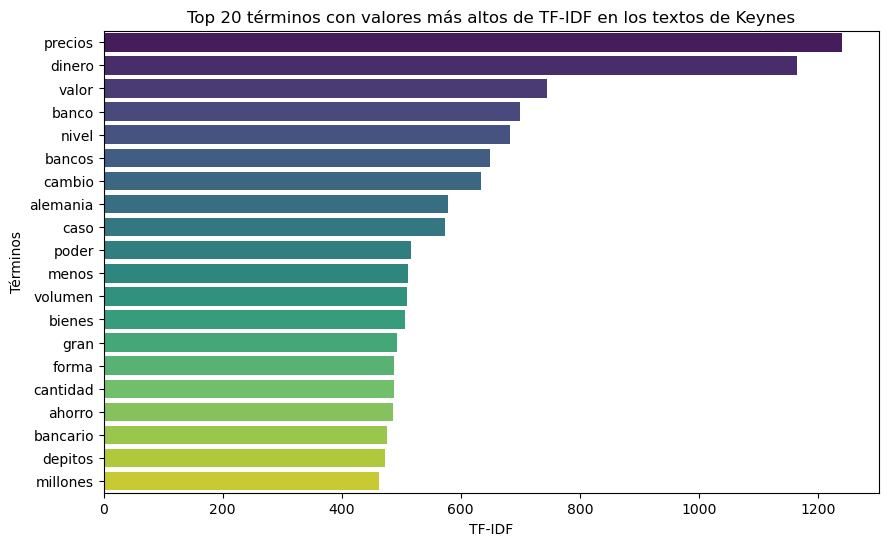

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(keynes_tokens)
terms = vectorizer.get_feature_names_out()

# Convertir la matriz TF-IDF a un DataFrame para facilitar el manejo de datos
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=terms)

# Calcular la suma de TF-IDF para cada término en todos los documentos
tfidf_sums = tfidf_df.sum(axis=1).sort_values(ascending=False)

# Seleccionar los términos con los valores de TF-IDF más altos
top_n = 20  # Número de términos a visualizar
top_terms = tfidf_sums.head(top_n)

# Visualización con Seaborn y Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=top_terms.values, y=top_terms.index, palette='viridis')
plt.title('Top {} términos con valores más altos de TF-IDF en los textos de Keynes'.format(top_n))
plt.xlabel('TF-IDF')
plt.ylabel('Términos')
plt.show()

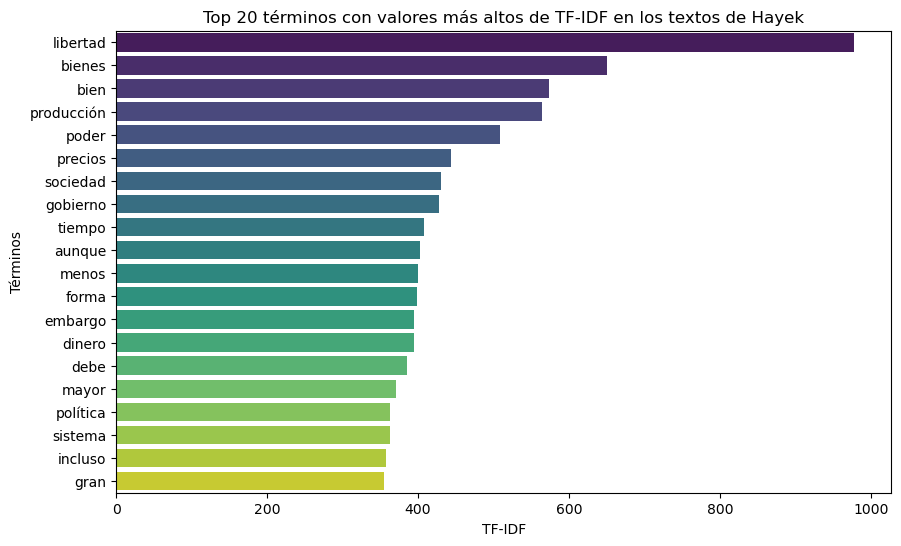

In [18]:
# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(hayek_tokens)
terms = vectorizer.get_feature_names_out()

# Convertir la matriz TF-IDF a un DataFrame para facilitar el manejo de datos
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=terms)

# Calcular la suma de TF-IDF para cada término en todos los documentos
tfidf_sums = tfidf_df.sum(axis=1).sort_values(ascending=False)

# Seleccionar los términos con los valores de TF-IDF más altos
top_n = 20  # Número de términos a visualizar
top_terms = tfidf_sums.head(top_n)

# Visualización con Seaborn y Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=top_terms.values, y=top_terms.index, palette='viridis')
plt.title('Top {} términos con valores más altos de TF-IDF en los textos de Hayek'.format(top_n))
plt.xlabel('TF-IDF')
plt.ylabel('Términos')
plt.show()